## Stack Overflow Ceveloper Survey 2020

December 2011 Stack Overflow launched their Annual User Survey to measure changes in user demographics and trends from the previous year. Stack Overflow have continued to reach out to the developer community to ask them a variety of questions, everything from their favorite technologies to their job preferences. The survey results are published and are available to view here: https://insights.stackoverflow.com/survey

The aim of this project is to explore the data provided by Stack Overflows' developer community.


In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
plt.style.use('ggplot')
import datetime

In [2]:
# Read csv file and specify the parameters: set the index column as respondent
# 64461 rows × 60 columns

sOverflow = pd.read_csv("data/survey_2020.csv", index_col='Respondent')
sOverflow.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
#Filter data
stackO = sOverflow[['DevType','OpSys','YearsCode','YearsCodePro','Country',
                    'Hobbyist','Age','Gender','Ethnicity','Employment',
                    'EdLevel','UndergradMajor','NEWEdImpt','NEWLearn',
                    'LanguageDesireNextYear','LanguageWorkedWith']]
stackO.head()
#64461 rows × 16 columns

,DevType,OpSys,YearsCode,YearsCodePro,Country,Hobbyist,Age,Gender,Ethnicity,Employment,EdLevel,UndergradMajor,NEWEdImpt,NEWLearn,LanguageDesireNextYear,LanguageWorkedWith
Respondent,,,,,,,,,,,,,,,,
1,"Developer, desktop or enterprise applications;...",Windows,36,27,Germany,Yes,NaN,Man,White or of European descent,"Independent contractor, freelancer, or self-em...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Fairly important,Once a year,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript
2,"Developer, full-stack;Developer, mobile",MacOS,7,4,United Kingdom,No,NaN,NaN,NaN,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Fairly important,Once a year,Python;Swift,JavaScript;Swift
3,NaN,Linux-based,4,NaN,Russian Federation,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,Objective-C;Python;Swift,Objective-C;Python;Swift
4,NaN,Linux-based,7,4,Albania,Yes,25.0,Man,White or of European descent,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Not at all important/not necessary,Once a year,NaN,NaN
5,NaN,Windows,15,8,United States,Yes,31.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once a year,Java;Ruby;Scala,HTML/CSS;Ruby;SQL


In [4]:
stackO_US = stackO.loc[stackO['Country'] == 'United States']
stackO_US.head()
#12469 rows × 16 columns

,DevType,OpSys,YearsCode,YearsCodePro,Country,Hobbyist,Age,Gender,Ethnicity,Employment,EdLevel,UndergradMajor,NEWEdImpt,NEWLearn,LanguageDesireNextYear,LanguageWorkedWith
Respondent,,,,,,,,,,,,,,,,
5,NaN,Windows,15,8,United States,Yes,31.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once a year,Java;Ruby;Scala,HTML/CSS;Ruby;SQL
8,"Developer, back-end;Developer, desktop or ente...",Linux-based,17,13,United States,Yes,36.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Not at all important/not necessary,Once a year,JavaScript,Python;SQL
14,"Developer, desktop or enterprise applications;...",Windows,5,1,United States,Yes,27.0,Man,White or of European descent,Employed full-time,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Somewhat important,Every few months,HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript
17,"Developer, full-stack",Windows,7,3,United States,Yes,25.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Fairly important,Once a year,C#;Go;Haskell;HTML/CSS;JavaScript;Python;Ruby;...,C#;HTML/CSS;JavaScript;Python;SQL;VBA
18,"Developer, back-end",Linux-based,19,12,United States,Yes,32.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once every few years,HTML/CSS;Perl,Bash/Shell/PowerShell;HTML/CSS;Perl


In [5]:
len(stackO_US[stackO_US['YearsCode']=='Less than 1 year'])

94

In [6]:
#convert 'Less than 1 year' to 0.6 (months) to allow data conversion to numeric
stackO_US= stackO_US.replace('Less than 1 year','0.6')
stackO_US.head()

,DevType,OpSys,YearsCode,YearsCodePro,Country,Hobbyist,Age,Gender,Ethnicity,Employment,EdLevel,UndergradMajor,NEWEdImpt,NEWLearn,LanguageDesireNextYear,LanguageWorkedWith
Respondent,,,,,,,,,,,,,,,,
5,NaN,Windows,15,8,United States,Yes,31.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once a year,Java;Ruby;Scala,HTML/CSS;Ruby;SQL
8,"Developer, back-end;Developer, desktop or ente...",Linux-based,17,13,United States,Yes,36.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Not at all important/not necessary,Once a year,JavaScript,Python;SQL
14,"Developer, desktop or enterprise applications;...",Windows,5,1,United States,Yes,27.0,Man,White or of European descent,Employed full-time,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Somewhat important,Every few months,HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript
17,"Developer, full-stack",Windows,7,3,United States,Yes,25.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Fairly important,Once a year,C#;Go;Haskell;HTML/CSS;JavaScript;Python;Ruby;...,C#;HTML/CSS;JavaScript;Python;SQL;VBA
18,"Developer, back-end",Linux-based,19,12,United States,Yes,32.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once every few years,HTML/CSS;Perl,Bash/Shell/PowerShell;HTML/CSS;Perl


In [7]:
len(stackO_US[stackO_US['YearsCode']=='Less than 1 year'])

0

In [8]:
len(stackO_US[stackO_US['YearsCode']=='0.6'])

94

In [9]:
len(stackO_US[stackO_US['YearsCode']=='More than 50 years'])

72

In [10]:
#convert 'More than 50 years' to 0.6 (months) to allow data conversion to numeric
stackO_US= stackO_US.replace('More than 50 years','50.6')
len(stackO_US[stackO_US['YearsCode']=='50.6'])

72

In [11]:
#convert columns to numeric
stackO_US['YearsCode'] = pd.to_numeric(stackO_US['YearsCode'])
stackO_US.head()

,DevType,OpSys,YearsCode,YearsCodePro,Country,Hobbyist,Age,Gender,Ethnicity,Employment,EdLevel,UndergradMajor,NEWEdImpt,NEWLearn,LanguageDesireNextYear,LanguageWorkedWith
Respondent,,,,,,,,,,,,,,,,
5,NaN,Windows,15.0,8,United States,Yes,31.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once a year,Java;Ruby;Scala,HTML/CSS;Ruby;SQL
8,"Developer, back-end;Developer, desktop or ente...",Linux-based,17.0,13,United States,Yes,36.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Not at all important/not necessary,Once a year,JavaScript,Python;SQL
14,"Developer, desktop or enterprise applications;...",Windows,5.0,1,United States,Yes,27.0,Man,White or of European descent,Employed full-time,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Somewhat important,Every few months,HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript
17,"Developer, full-stack",Windows,7.0,3,United States,Yes,25.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Fairly important,Once a year,C#;Go;Haskell;HTML/CSS;JavaScript;Python;Ruby;...,C#;HTML/CSS;JavaScript;Python;SQL;VBA
18,"Developer, back-end",Linux-based,19.0,12,United States,Yes,32.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once every few years,HTML/CSS;Perl,Bash/Shell/PowerShell;HTML/CSS;Perl


In [12]:
stackO_US['Gender'].unique()

array(['Man', 'Woman', nan,
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [26]:
nan = len(stackO_US[stackO_US['Gender']=='nan'])
man = len(stackO_US[stackO_US['Gender']=='Man;Non-binary, genderqueer, or gender non-conforming'])
lgbtq = len(stackO_US[stackO_US['Gender']=='Non-binary, genderqueer, or gender non-conforming'])
woman = len(stackO_US[stackO_US['Gender']=='Woman;Non-binary, genderqueer, or gender non-conforming'])
wm_non= len(stackO_US[stackO_US['Gender']=='Woman;Man;Non-binary, genderqueer, or gender non-conforming'])

print(f"Nan:{(nan)}")
print(f"Man:{(man)}")
print(f"Woman:{(woman)}")
print(f"LGBTQ:{(lgbtq)}")
print(f"Woman:Man-Non-Binary:{(wm_non)}")

Nan:0
Man:42
Woman:46
LGBTQ:131
Woman:Man-Non-Binary:3


In [27]:
male_US = stackO_US[stackO_US['Gender']=='Man;Non-binary, genderqueer, or gender non-conforming']
male_US.count()

DevType                   32
OpSys                     41
YearsCode                 42
YearsCodePro              32
Country                   42
Hobbyist                  42
Age                       41
Gender                    42
Ethnicity                 39
Employment                41
EdLevel                   41
UndergradMajor            36
NEWEdImpt                 33
NEWLearn                  39
LanguageDesireNextYear    42
LanguageWorkedWith        42
dtype: int64

In [28]:
years=male_US.sort_values(by ='YearsCode',ascending = True)
years

,DevType,OpSys,YearsCode,YearsCodePro,Country,Hobbyist,Age,Gender,Ethnicity,Employment,EdLevel,UndergradMajor,NEWEdImpt,NEWLearn,LanguageDesireNextYear,LanguageWorkedWith
Respondent,,,,,,,,,,,,,,,,
62532,NaN,Windows,2.0,NaN,United States,Yes,19.0,"Man;Non-binary, genderqueer, or gender non-con...",White or of European descent,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",NaN,Every few months,HTML/CSS;Java;JavaScript,C#;C++;HTML/CSS;JavaScript;Python;VBA
48477,"Developer, desktop or enterprise applications;...",MacOS,3.0,1,United States,Yes,34.0,"Man;Non-binary, genderqueer, or gender non-con...",White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A business discipline (such as accounting, fin...",Not at all important/not necessary,Every few months,Dart;Haskell;R;Rust;Scala,Bash/Shell/PowerShell;C#;Go;HTML/CSS;Java;Java...
3978,Data or business analyst;Data scientist or mac...,Windows,5.0,NaN,United States,No,22.0,"Man;Non-binary, genderqueer, or gender non-con...",White or of European descent,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",NaN,Every few months,Bash/Shell/PowerShell;C;C#;C++;Java;Python,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...
5758,Academic researcher;Data or business analyst;S...,Windows,5.0,4,United States,Yes,22.0,"Man;Non-binary, genderqueer, or gender non-con...",White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A natural science (such as biology, chemistry,...",Not at all important/not necessary,Every few months,Bash/Shell/PowerShell;C#;C++;Go;Python;R;Rust;SQL,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...
48407,Academic researcher;Data or business analyst;D...,Linux-based,5.0,4,United States,Yes,23.0,"Man;Non-binary, genderqueer, or gender non-con...",White or of European descent,Employed full-time,"Secondary school (e.g. American high school, G...",NaN,Not at all important/not necessary,Every few months,Assembly;Haskell;Rust,Rust
53652,NaN,Windows,6.0,2,United States,Yes,36.0,"Man;Non-binary, genderqueer, or gender non-con...",Hispanic or Latino/a/x;Middle Eastern;White or...,Employed full-time,"Associate degree (A.A., A.S., etc.)",Fine arts or performing arts (such as graphic ...,Fairly important,Every few months,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Python,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Python
53500,NaN,MacOS,6.0,NaN,United States,Yes,22.0,"Man;Non-binary, genderqueer, or gender non-con...",White or of European descent,Student,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Once a year,Haskell;Kotlin;Python;Rust,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
34562,"Developer, front-end;Developer, full-stack",MacOS,6.0,4,United States,Yes,38.0,"Man;Non-binary, genderqueer, or gender non-con...",White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fine arts or performing arts (such as graphic ...,Not at all important/not necessary,NaN,JavaScript,JavaScript
1457,"Developer, front-end;Developer, full-stack",NaN,7.0,4,United States,No,25.0,"Man;Non-binary, genderqueer, or gender non-con...",White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Fairly important,Once a year,HTML/CSS;JavaScript,HTML/CSS;Java;JavaScript


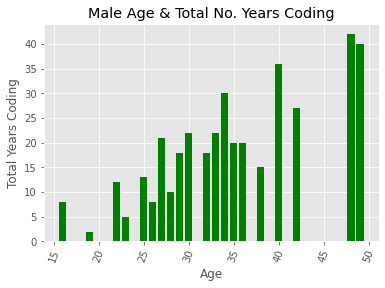

In [29]:
gender_dist = stackO_US["Gender"].value_counts()
# total
x_axis = male_US.Age
y_axis = male_US.YearsCode
plt.bar(x_axis,y_axis, color = 'g')
plt.xticks(rotation = 70)
plt.title ('Male Age & Total No. Years Coding')
plt.xlabel('Age')
plt.ylabel('Total Years Coding')
plt.show()

In [30]:
female_US = stackO_US[stackO_US['Gender']=='Woman;Non-binary, genderqueer, or gender non-conforming']
female_US.count()

DevType                   34
OpSys                     46
YearsCode                 46
YearsCodePro              31
Country                   46
Hobbyist                  46
Age                       44
Gender                    46
Ethnicity                 46
Employment                46
EdLevel                   46
UndergradMajor            38
NEWEdImpt                 35
NEWLearn                  42
LanguageDesireNextYear    46
LanguageWorkedWith        45
dtype: int64

In [31]:
lgbtq_US = stackO_US[stackO_US['Gender']=='Non-binary, genderqueer, or gender non-conforming']
lgbtq_US.head()

,DevType,OpSys,YearsCode,YearsCodePro,Country,Hobbyist,Age,Gender,Ethnicity,Employment,EdLevel,UndergradMajor,NEWEdImpt,NEWLearn,LanguageDesireNextYear,LanguageWorkedWith
Respondent,,,,,,,,,,,,,,,,
211,"Developer, back-end",MacOS,6.0,5,United States,Yes,34.0,"Non-binary, genderqueer, or gender non-conforming",White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A social science (such as anthropology, psycho...",Not at all important/not necessary,Once a year,Bash/Shell/PowerShell;Go;Python,Bash/Shell/PowerShell;Go;Python
651,NaN,Windows,8.0,NaN,United States,Yes,22.0,"Non-binary, genderqueer, or gender non-conforming",South Asian,"Not employed, but looking for work",Some college/university study without earning ...,"Computer science, computer engineering, or sof...",NaN,Every few months,C#;Objective-C;SQL,C;C++;HTML/CSS;Java;JavaScript;PHP;Python;SQL
784,"Developer, back-end",Linux-based,10.0,4,United States,Yes,24.0,"Non-binary, genderqueer, or gender non-conforming",Black or of African descent;Hispanic or Latino...,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Critically important,Every few months,Bash/Shell/PowerShell;C;Kotlin;Perl;Python;SQL,Assembly;Bash/Shell/PowerShell;C;C++;Haskell;H...
1413,"Database administrator;Designer;Developer, bac...",Windows,13.0,3,United States,Yes,25.0,"Non-binary, genderqueer, or gender non-conforming",White or of European descent,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Fairly important,NaN,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl...
1583,"Database administrator;Developer, back-end;Dev...",MacOS,6.0,3,United States,Yes,18.0,"Non-binary, genderqueer, or gender non-conforming",Black or of African descent;White or of Europe...,Employed part-time,"Secondary school (e.g. American high school, G...",NaN,Not at all important/not necessary,Every few months,Bash/Shell/PowerShell;Dart;Go;HTML/CSS;Java;Ja...,Bash/Shell/PowerShell;Dart;HTML/CSS;Java;JavaS...


In [33]:
# Generate a pie plot showing the distribution of gender 
#gender_dist = stackO_US["Gender"].value_counts()
# dist_mf.values
#gender_dist.plot.pie(autopct ='%1.1f%%',radius=2, startangle = 40)